In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

# Load the Iris Dataset

In [ ]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Extract the features that will be used for cluster prediction

In [ ]:
X=iris.iloc[:,1:-1].values

# Prediction:  
- Initially, the model is trained by taking clusters size as a range of 1-10
- Error in all these models is taken in a list


In [ ]:
from sklearn.cluster import KMeans
error=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i).fit(X)
  error.append(kmean.inertia_)

- The error in each model is plotted against respective number of clusters
- The number where an elbow is formed is the optimal number of clusters
- This is called the elbow method

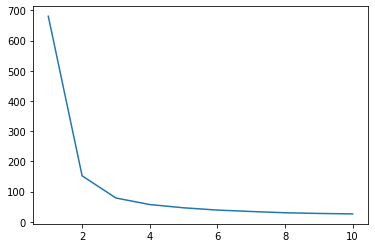

In [ ]:
plt.plot(range(1,11),error)

- From the graph we can see that, the optimal number of clusters is between 2 and 4
- Thus the final model is trained having 3 clusters.

# Final Model:  
- The model is trained using 3 as the number of clusters
- The cluster values are then predicted

In [ ]:
kmean3=KMeans(n_clusters=3)
y_kmean3 = kmean3.fit_predict(X)

# Visualization:
- Cluster values are plotted for first two columns i.e Sepal Length and Sepal Width

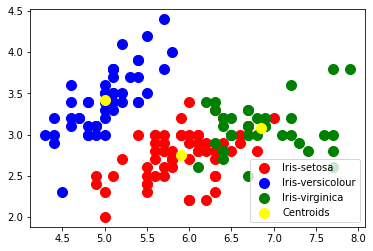

In [ ]:
plt.scatter(X[y_kmean3 == 0, 0], X[y_kmean3 == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmean3 == 1, 0], X[y_kmean3 == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmean3 == 2, 0], X[y_kmean3 == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean3.cluster_centers_[:, 0], kmean3.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()